## Import Libraries

In [2]:
# Ignore warnings
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Load Data

In [3]:
# adjust the path accordingly
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
#exclude rows with TotalCharges column contains white spaces
df = df.loc[~df['TotalCharges'].str.contains(' ')]

#Transform TotalCharges col to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

## Preliminary Look and Data Cleansing

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Data Dictionary :
1. `customerID`: Customer ID.
2. `gender`: Customer gender (Male/ Female).
3. `SeniorCitizen`: Whether the customer is a senior citizen (65 or older) or not. (1= Senior Citizen; 0=non Senior Citizen).
4. `Partner`: Indicates if customer has partner or not/single (Yes/ No).
5. `Dependents`: Whether the customer has dependents or not (Yes/No). Dependents can be children, parents, etc.
6. `tenure`: Represents the total number of months that customers have been with the company.
7. `PhoneService`: Indicates whether the customer subscribes to the phone service or not (Yes/ No).
8. `MultipleLines`: Indicates whether the customer subscribes to multiple lines (Yes/ No).
9. `InternetService`: Indicates the customer's internet service type (DSL/ Fiber Optic/ No).
10. `OnlineSecurity`: Indicates whether the customer subscribes to additional online security services (Yes/ No/ No internet service).
11. `OnlineBackup`: Indicates whether the customer subscribes to an additional online backup service (Yes/ No/ No internet Service).
12. `DeviceProtection`: Indicates whether the customer subscribes to additional Device Protection for their Internet equipment (Yes/ No/ No internet service).
13. `TechSupport`: Indicates whether the customer is subscribed to an additional Technical Support package (Yes/No/ No internet service).
14. `StreamingTV`: Indicates whether subscribers use their Internet service to stream television programs (Yes/ No/ No internet service).
15. `StreamingMovies`: Indicates whether subscribers use their Internet service to stream television programs (Yes/ No/ No internet service).
16. `Contrac`t: Shows the customer's current contract type (Month-to-month/ One year/ Two year).
17. `PaperlessBilling`: Indicates whether the customer uses paperless billing (Yes/ No).
18. `PaymentMethod`: Shows the customer's choice of how to pay for their bill (Electronic check/ Mailed check/ Bank transfer (automatic)/ Credit card (automatic)).
19. `MonthlyCharge`s: Shows the customer's current total monthly charges for all the services they use.
20. `TotalCharge`s: Shows the total cost of the customer
21. `Churn`: Shows Customer churn status (Yes/ No).

In [6]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1686,6839-ITVZJ,Female,0,Yes,Yes,26,Yes,Yes,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,60.05,1616.15,Yes
6978,6439-PKTRR,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Electronic check,80.70,5617.95,No
3579,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.30,No
1323,4565-NLZBV,Female,0,Yes,No,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.65,1710.15,No
4533,5360-LJCNJ,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.15,7555.00,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

Observation :
1. most of the columns are categorical column
2. numeric column : `SeniorCitizen`, `tenure`,`MonthlyCharge`, and `TotalCharge`
3. No missing values detected
4. No duplication detected

# 1. Standar EDA

## 1.1 Statistical Summary

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
numerical = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
df[numerical].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observation :
1. The maximum and minimum values of each columns are makes sense
2. `SeniorCitizen` is boolean since the value is only 0 or 1, no need to conclude its simmetricity
3. mean != median for all columns, indicates unsymmetrical distributions


In [12]:
categorical = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
df[categorical].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [13]:
for col in categorical:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

Value counts of OnlineBackup column
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64 

Value counts of DeviceProtection column
N

Observation :
The rest categorical columns have 2-4 categories, that applicable for the further analysis

## 1.2 Univariate Analysis

## 1.2.1 Boxplot to detect outlier

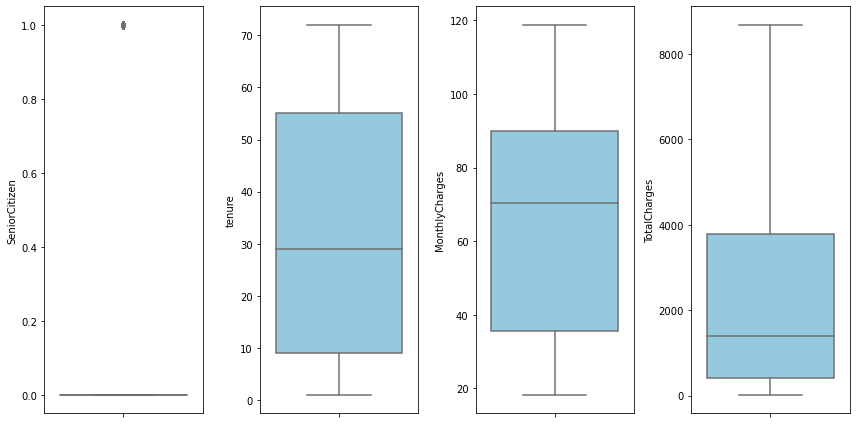

In [14]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

Observation 
1. No outliers detected for each column `tenure`,`MonthlyCharges`,and `TotalCharges`
2. `SeniorCitizen` is boolen value, ignore the boxplot
3. Overall, no outlier detected

### 1.2.2 KDE plot for knowing the distribution form

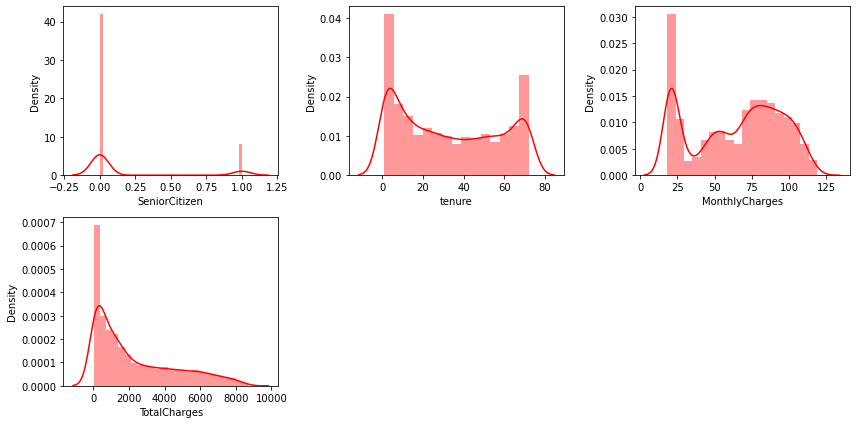

In [15]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)

    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='red')
    plt.xlabel(features[i])
    plt.tight_layout()

1. `MonthlyCharges` and `TotalCharges` distribution are positively skewed, Indicates that most of the customers have low `MonthlyCharges` and `TotalCharges`
2. Since `SeniorCitizen` is boolean value we cannot conclude its distribution, but we can say the frequency of 0 > 1, Indicates that most of the customers are NonSeniorCitizen
3. `tenure` is bimodal dsitribution since it has 2 peaks, indicates that most of the customers are new customers and customers who have been subscribed about 70 month

### 1.2.3 Count Plot for Categorical Column

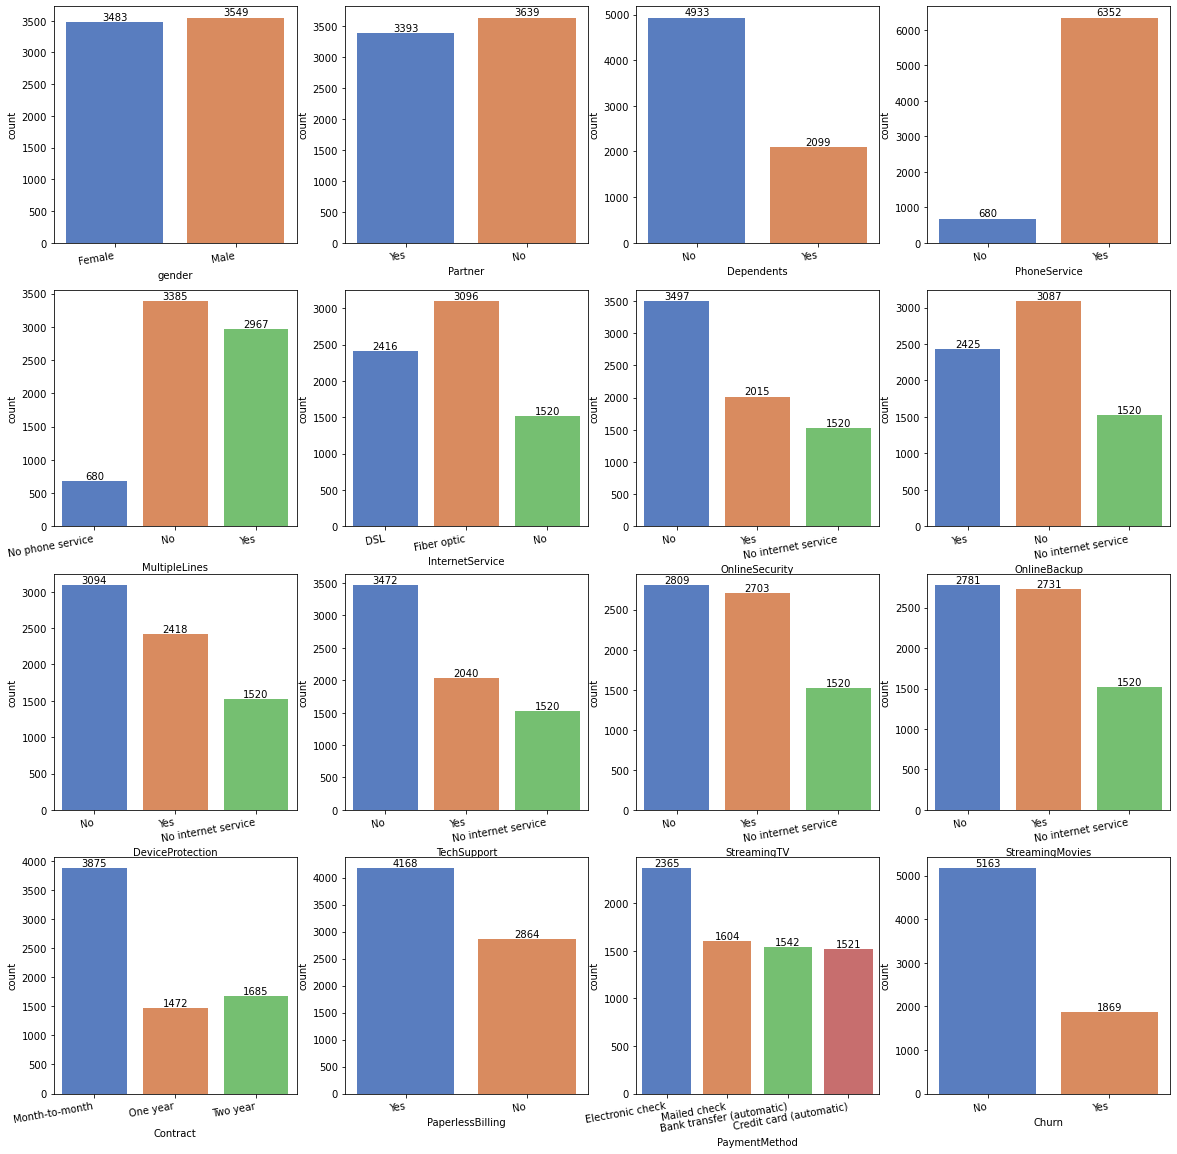

In [16]:
plt.figure(figsize = (20,20))
for i in enumerate(categorical):
  plt.subplot (4,4,i[0]+1)
  ax = sns.countplot(i[1], data= df, palette='muted')
  plt.xticks(rotation = 10, ha='right')
  plt.bar_label(ax.containers[0])
 
  

Observation :

1. Frequency of non`dependents` customers greater than `dependents customers
2. Frequency of customers with `PhoneServices` greater than with no `PhoneService`
3. Frequency of `Fiber optic` customers greater than `DSL
4. Frequency of customers with `OnlineSecurity` greater tha with no `OnlineSecurity`
5. Frequency of customers with No `OnlineBackup` greater than customers with `OnlineBackup`
6. Fequency of customers with `DeviceProtection` greater than custoers with no `DeviceProtection`
7. Frequency of customers with `no `TechSupport` greater than customers with `TechSupport`
8. Frequency of Month-to-month `Contract` greater than one year and two year contract
9. Frequency of `PaperlessBilling` greater than with no `PaperlessBilling
10.Frequency of Electronic check `PaymentMethod` greater than other methods
11. Frequency of Non `Churn` customers is greater than `Churn` customers

## 1.3 Multivariate Analysis

### 1.3.1 Correlation Heatmap

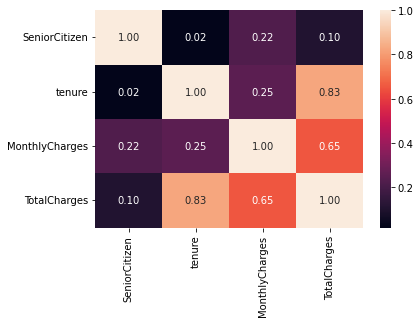

In [17]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.show()

Observation:
1. Strong correlation found between `tenure` and `TotalCharge`, use for further analysis using pair plot
2. Weak correlation between `MonthlyCharges` and `tenure`
3. Again, just ignore `SeniorCitizen` because its boolean


### 1.3.2 Pairplot 

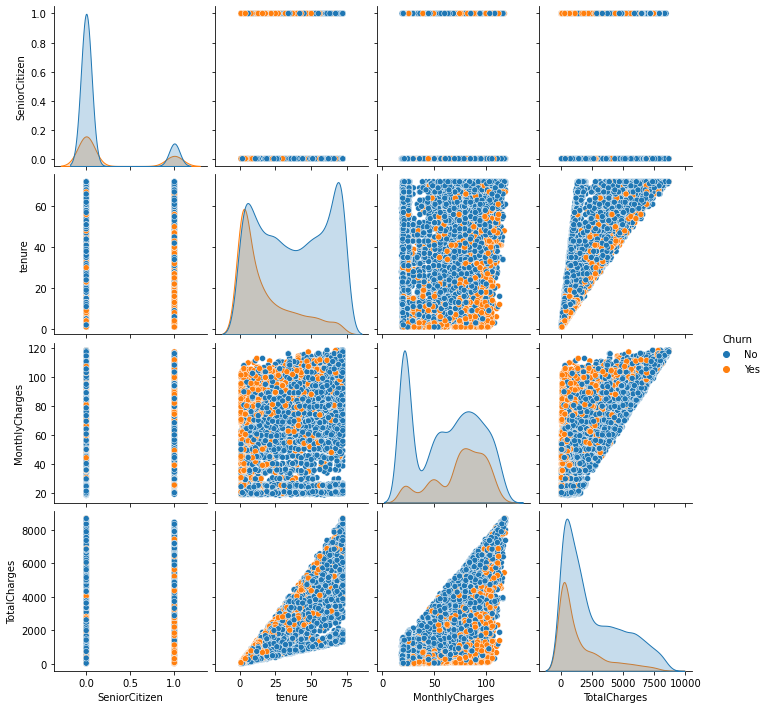

In [18]:
sns.pairplot(df, hue='Churn')
plt.show()

Observation :
1. Non `SeniorCitizen` (under 65th) tends to Churn than `SeniorCitizen` (65th or older)
2. New costumers (lower `tenure` : around 0-25)  more likely to churn meanwhile olde customers (`tenure`: around 60-75) tend to stay
3. Customers with higher `MonthlyCharges` (around 60-100) tend to churn meanwhile  customers with lower `Monthlycharges` (0-40) are morelikely stay
4. `TotalCharge` shows no interesting insight
5. From the heatmap we know the correlation between `TotalCharges` and `tenure` are quiet strong, from this pairplot i can say the older customer (bigger `tenure`) tends to have higher `TotalCharge`

### 1.3.3  Categorical Columns

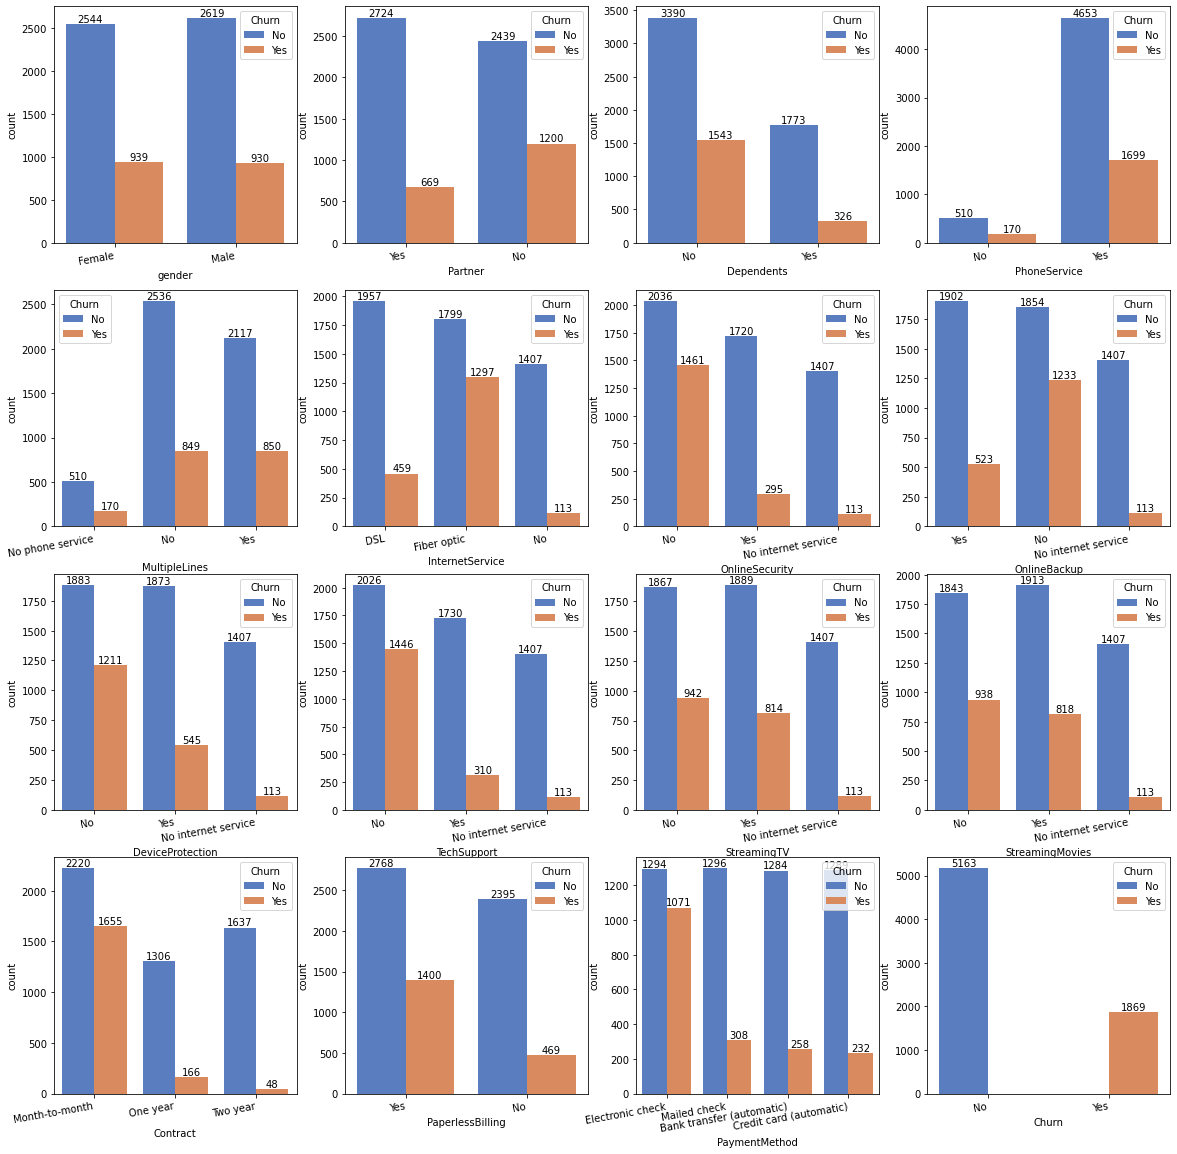

In [19]:
plt.figure(figsize = (20,20))
for i in enumerate(categorical):
  plt.subplot (4,4,i[0]+1)
  ax = sns.countplot(i[1], hue='Churn', data= df, palette='muted')
  plt.xticks(rotation = 10, ha='right')
  plt.bar_label(ax.containers[0])
  plt.bar_label(ax.containers[1])
  

Observation:
1. `gender` shows for both gender the count of customer churn or not churn are approximately the same, so I can say gender doesn't affect Churn
2. `Partner` shows customers with no partner (single) tend to churn more than customers with partner
3. `Dependents`shows customers who have no dependents (children, parents, or family members) have greater Churn and customers with no dependents are approx twice as many as customers with dependents
4. `PhoneService`shows Customers Sign up for Phone Service is greater than those who don't but it also has greater churn , we'll check next data for its services
5. `MultipleLines` shows the Churn frequency are approximately the same for customers with or without multiplelines, i can say this service doesnt affect churn
6. `InternetServices` shows customers with Fiber Optic internet service more likely churn and customers with no Internet Service have the lowest churn
7. `OnlineSecurity` shows customers who don't sign up for Online Security more likely churn than customer with online security
8. `OnlineBackup`shows customers without Online Back up tend to churn than witth online backp up
9. `DeviceProtection` shows customers without Device Protection are more likely churn than with Device Protection
10. `TechSupport` shows customers without Tech Support tend to churn than with Tech Support
11. `StreamingTV` shows customers without StreamingTV more likely churn than customer who sign up for Streaming TV
12. `StreamingMovie`shows customers who do not sign up for streaming movie are more likely churn than who sign up for streaming movie
13.`Contract` shows customers with month-to-month conctract are more likely to churn and the lowest churn happen in customer with 2 years contract
14. `PaperBilling` shows customers with Paperless Billings tend to churn than customers without Paperless Billings
15. `PaymenMethod` shows customers with electronic check are more likely churn, customers with credit card have the lowest churn
16. `Churn` shows that overall, the frequency of churn customers are lower than loyal customers

# 2. Deep Dive EDA

In [20]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**1. Based on multivariate analysis, fiber optic experiences more churn than other internet services. What is the average monthly charge and average tenure of customers using fiber optic compared to DSL?**

In [21]:
is_cust = df.groupby(['InteretService','Churn']).agg(
            Avg_MonthlyCharge = ('MonthlyCharges','mean'), 
            Avg_Tenure = ('tenure','mean')).reset_index()
is_cust

,InternetService,Churn,Avg_MonthlyCharge,Avg_Tenure
0,DSL,No,60.200026,37.293817
1,DSL,Yes,49.083224,14.111111
2,Fiber optic,No,93.932379,42.089494
3,Fiber optic,Yes,88.126484,20.196608
4,No,No,21.133156,32.469083
5,No,Yes,20.368142,8.238938


Fiber optic subscribers who are experiencing churn may indeed be affected by quite large monthly fees because the average monthly charge is higher than DSL. For Fiber Optic, the average subscriber who churns only subscribes for up to the 20th month and DSL who churns subscribes for up to the 14th month. So it might be necessary to examine how the actual service performance on fiber optic and DSL does it often experience interruptions? or the company can adjust the monthly charge price for these services so that the price is more affordable, referring to the average monthly charge of customers who experience churn

**2. What is the monthly cost of customers who experience churn based on dependent and age**

In [75]:
dep_age = df.groupby(['SeniorCitizen','Dependents','Churn']).agg(
            MonthlyCharge_avg = ('MonthlyCharges', 'mean')).reset_index()
dep_age_churn=dep_age[contract['Churn']=='Yes']
dep_age_churn.drop(columns=['Churn'], inplace =True)
dep_age_churn

C:\Users\ACER\AppData\Local\Temp\ipykernel_9764\600196947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dep_age_churn.drop(columns=['Churn'], inplace =True)


,SeniorCitizen,Dependents,MonthlyCharge_avg
1,0,No,72.350138
3,0,Yes,72.111678
5,1,No,80.588546
7,1,Yes,83.290909


There is no significant difference from the average MonthlyCharge paid by customers with or without dependents in each age category (`seniorCitizen`). I can say that monthly payments for customers whithout dependents are almost the same as payments for dependent customers. Need further analysis why this can happen so that companies can adjust the services provided with a monthly fee. from the table above also shown that seniorcitizen (>=65th) having more monthlycharge than non seniorcitizen (<65th)

**3. Percentage of customers based on Payment Method**

In [66]:
percPM = df['PaymentMethod'].value_counts()
percPM

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

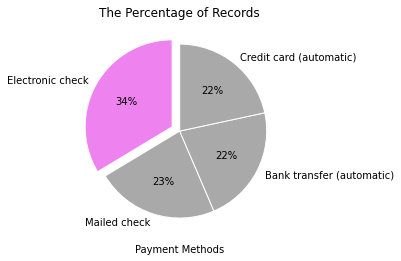

In [70]:
color = ["violet", 'darkgrey',"darkgrey", "darkgrey"]
plt.pie(percPM.values, labels=percPM.index, startangle=90, autopct='%1.0f%%', explode=(0.1,0,0,0), colors = color, wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'white'} )

plt.title("The Percentage of Records")
plt.xlabel("Payment Methods")
plt.show()


The use of electronic checks is more widely used than other payment methods, so companies must ensure the convenience and quality of services with the electronic check payment method to prevent customer churn because in multivariate analysis electronic checks have the most churn compared to other payment methods.